# Opinion dynamics

Baseline paramaters

Net-size: 100 – It seems like a nice, round number

Num-comms: 3 - The average person has 3-5 close friends (https://www.bustle.com/articles/158302-the-ideal-number-of-best-friends-is-lower-than-you-think-but-dont-start-dropping-people). I think close friends would be most able to have valued opinions. Only some of them may be close enough to influence your opinions, so we’ll stay on the low end.

BC-level: 3.17 - The standard deviation of a range 1-12 with uniform distribution

In [31]:
library(tidyverse)
library(dplyr)

In [32]:
#import 
numconn_runs <- read.csv('numconn.csv', skip=6, header=TRUE)

In [33]:
bclvl_runs <- read.csv('bclvl.csv', skip=6, header=TRUE)

In [34]:
size_runs <- read.csv('size.csv', skip=6, header=TRUE)

In [35]:
head(numconn_runs)

X.run.number.,BC.level,net.size,num.conns,X.step.,num.zones.value
7,3.17,100,1,69,35
4,3.17,100,1,139,36
8,3.17,100,1,162,40
2,3.17,100,1,107,41
5,3.17,100,1,163,36
3,3.17,100,1,85,46


In [36]:
numconn_group <- numconn_runs %>%
  group_by(num.conns) %>%
  summarise(
    mean_20 = mean(num.zones.value)
  )

In [37]:
bclvl_group <- bclvl_runs %>%
  group_by(BC.level) %>%
  summarise(
    mean_20 = mean(num.zones.value)
  )

In [38]:
size_group <- size_runs %>%
  group_by(net.size) %>%
  summarise(
    mean_20 = mean(num.zones.value)
  )

# Number of connections

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


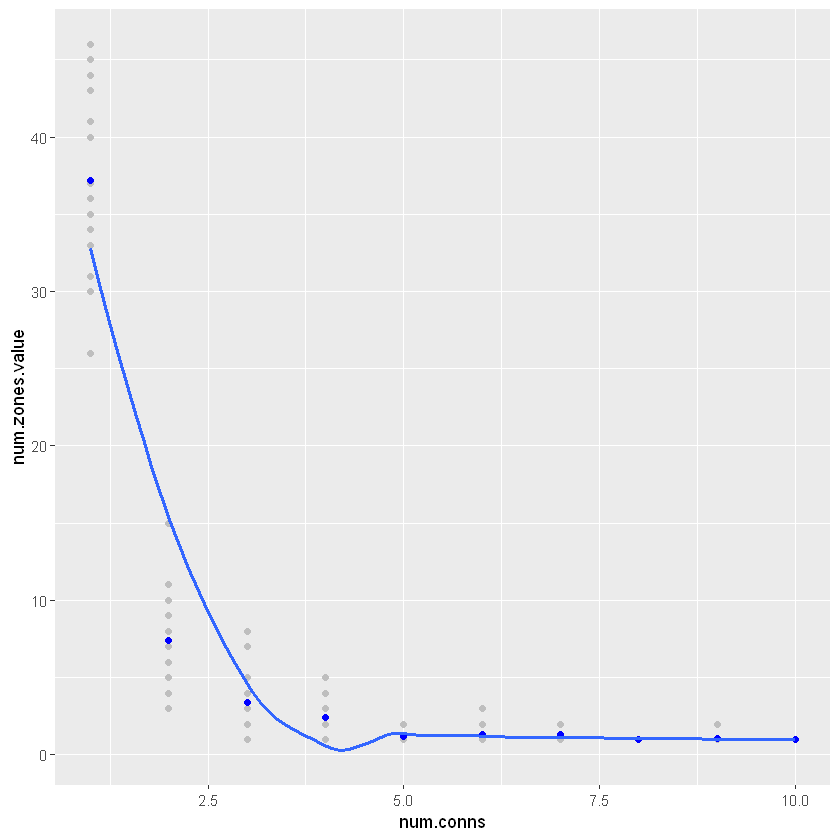

In [39]:
ggplot(numconn_runs, aes(x=num.conns, y=num.zones.value)) + geom_point(color="gray") + geom_point(data=numconn_group, mapping=aes(x=num.conns, y=mean_20), color="blue") + geom_smooth(se=FALSE)

There is almost always just 1 joint opinion group with 5 or more connections. Having 1 group also occured with 3 and 4 connections, but not 2. This result makes sense. The more people you engage with, the more your opinion will be or is likely to be changed.

# BC level

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


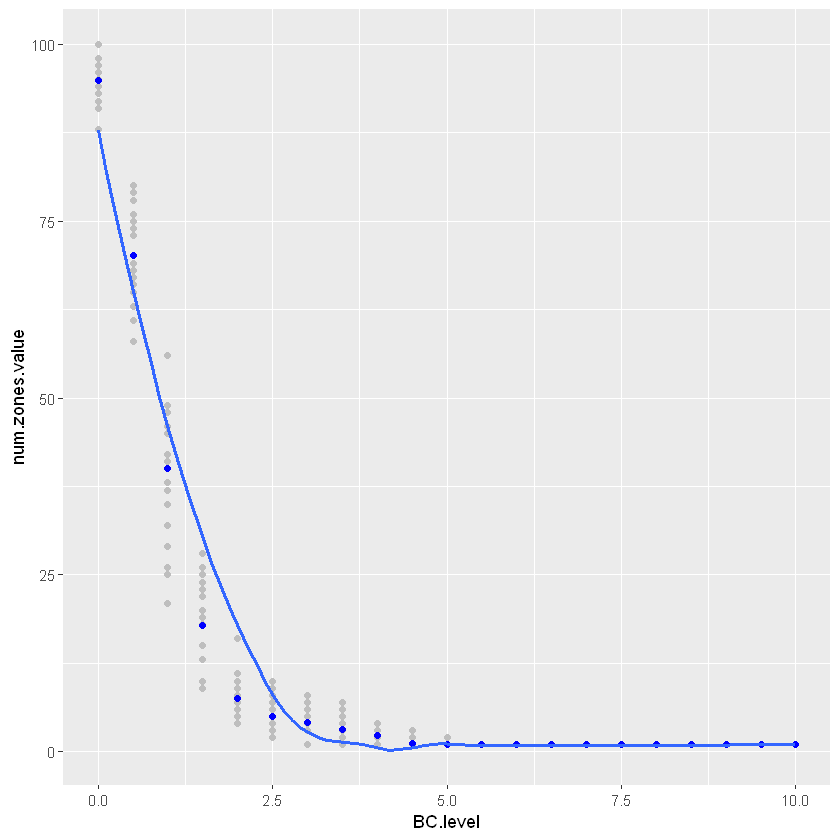

In [40]:
ggplot(bclvl_runs, aes(x=BC.level, y=num.zones.value)) + geom_point(color="gray") + geom_point(data=bclvl_group, mapping=aes(x=BC.level, y=mean_20), color="blue") + geom_smooth(se=FALSE)

The more tolerant people are of other opinions (the more they let them influence them), the more convergance there will be. 

It is difficult to indentify where the BC-level is in America today, because we don't know how many groups there should be. It's tempting, but we can't say that we expect there to be 2 main groups - Republicans and Democrats - and therefore our BC-level is 3-4ish. We can't say that because the structure of our election systems dictate a choice between 2, and other systems may result in major third parties. This has nothing to do with how people are influenced.

It is also can't be assumed this model is even accurate enough - perhaps some people people will become more extreme if connected with the other extreme. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


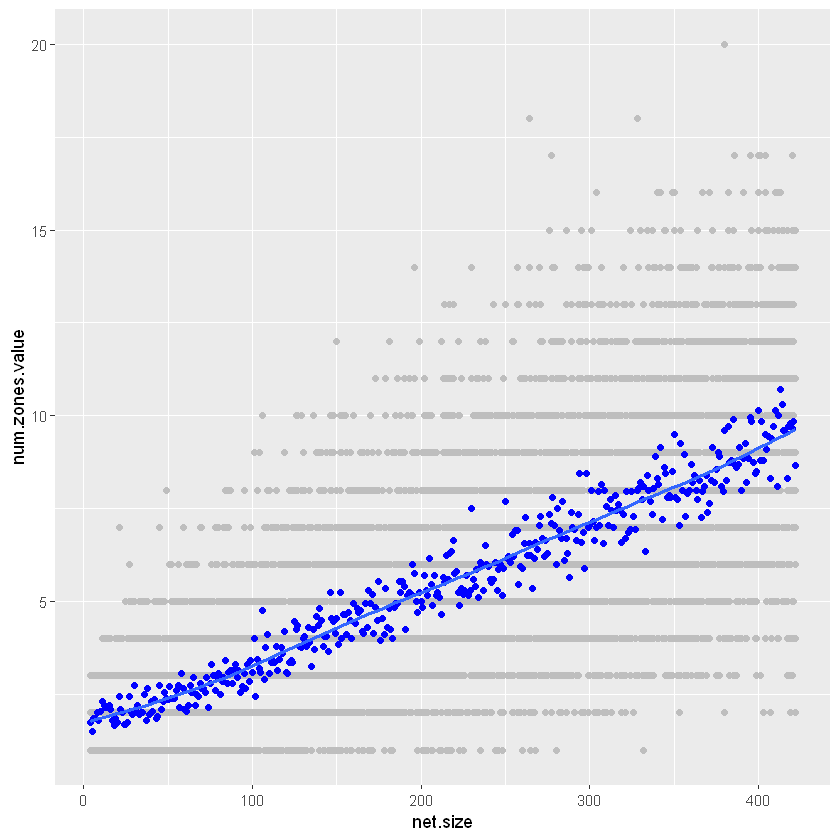

In [41]:
ggplot(size_runs, aes(x=net.size, y=num.zones.value)) + geom_point(color="gray") + geom_point(data=size_group, mapping=aes(x=net.size, y=mean_20), color="blue") + geom_smooth(se=FALSE)

The more people there are, the more groups there are likely to be. With groups only being defined as opinion within 0.1, this is expected. With more people, there are more likely to be more islands of opinion.